# Problem Statement:
This data set presents an employee survey from IBM, indicating if there is attrition or not. The data set contains approximately 1500 entries. Given the limited size of the data set, the model should only be expected to provide modest improvement in indentification of attrition vs a random allocation of probability of attrition.

## The Data

(Data source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset.)

IBM has gathered information on employee satisfaction, income, seniority and some demographics. It includes the data of 1470 employees. To use a matrix structure, we changed the model to reflect the followin data

##### CHECK TABLE
Name	Description

AGE	Numerical Value

ATTRITION	Employee leaving the company (0=no, 1=yes)

BUSINESS TRAVEL	(1=No Travel, 2=Travel Frequently, 3=Tavel Rarely)

DAILY RATE	Numerical Value - Salary Level

DEPARTMENT	(1=HR, 2=R&D, 3=Sales)

DISTANCE FROM HOME	Numerical Value - THE DISTANCE FROM WORK TO HOME

EDUCATION	Numerical Value

EDUCATION FIELD	(1=HR, 2=LIFE SCIENCES, 3=MARKETING, 4=MEDICAL SCIENCES, 5=OTHERS, 6= TEHCNICAL)

EMPLOYEE COUNT	Numerical Value

EMPLOYEE NUMBER	Numerical Value - EMPLOYEE ID

ENVIROMENT SATISFACTION	Numerical Value - SATISFACTION WITH THE ENVIROMENT

GENDER	(1=FEMALE, 2=MALE)

HOURLY RATE	Numerical Value - HOURLY SALARY

JOB INVOLVEMENT	Numerical Value - JOB INVOLVEMENT

JOB LEVEL	Numerical Value - LEVEL OF JOB

JOB ROLE	(1=HC REP, 2=HR, 3=LAB TECHNICIAN, 4=MANAGER, 5= MANAGING DIRECTOR, 6= REASEARCH DIRECTOR, 7= RESEARCH SCIENTIST, 
8=SALES EXECUTIEVE, 9= SALES REPRESENTATIVE)

JOB SATISFACTION	Numerical Value - SATISFACTION WITH THE JOB

MARITAL STATUS	(1=DIVORCED, 2=MARRIED, 3=SINGLE)

MONTHLY INCOME	Numerical Value - MONTHLY SALARY

MONTHY RATE	Numerical Value - MONTHY RATE

NUMCOMPANIES WORKED	Numerical Value - NO. OF COMPANIES WORKED AT

OVER 18	(1=YES, 2=NO)

OVERTIME	(1=NO, 2=YES)

PERCENT SALARY HIKE	Numerical Value - PERCENTAGE INCREASE IN SALARY

PERFORMANCE RATING	Numerical Value - ERFORMANCE RATING

RELATIONS SATISFACTION	Numerical Value - RELATIONS SATISFACTION

STANDARD HOURS	Numerical Value - STANDARD HOURS

STOCK OPTIONS LEVEL	Numerical Value - STOCK OPTIONS

TOTAL WORKING YEARS	Numerical Value - TOTAL YEARS WORKED

TRAINING TIMES LAST YEAR	Numerical Value - HOURS SPENT TRAINING

WORK LIFE BALANCE	Numerical Value - TIME SPENT BEWTWEEN WORK AND OUTSIDE

YEARS AT COMPANY	Numerical Value - TOTAL NUMBER OF YEARS AT THE COMPNAY

YEARS IN CURRENT ROLE	Numerical Value -YEARS IN CURRENT ROLE

YEARS SINCE LAST PROMOTION	Numerical Value - LAST PROMOTION

YEARS WITH CURRENT MANAGER	Numerical Value - YEARS SPENT WITH CURRENT MANAGER


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [2]:
data= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Check for Null values and Class label count.

print(data.info())

print('*******************************************************************************')
print('\n',data['Attrition'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Distribution of class labels 

Number of attrition  237 , ( 16.122448979591837 %)
Number of no attrition  1233 , ( 83.87755102040816 %)


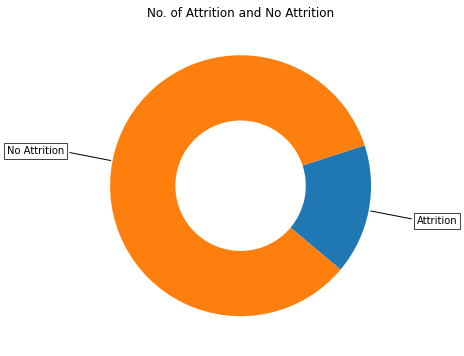

In [5]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts =data['Attrition'].value_counts()
print("Number of attrition ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of no attrition ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Attrition", "No Attrition"]

data_temp = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data_temp, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("No. of Attrition and No Attrition")

plt.show()

In [6]:
data['Attrition'] = data['Attrition'].replace(['Yes','No'],[1,0])
data['BusinessTravel'] = data['BusinessTravel'].replace(['Non-Travel'],['Non_Travel'])
data['Department'] = data['Department'].replace(['Research & Development','Human Resources'],['Research_Development','Human_Resources'])
data['EducationField'] = data['EducationField'].replace(['Life Sciences','Technical Degree','Human Resources'],['Life_Sciences','Technical_Degree','Human_Resources'])
data['JobRole'] = data['JobRole'].replace(['Healthcare Representative','Human Resources','Laboratory Technician','Manufacturing Director','Research Director','Research Scientist','Sales Executive','Sales Representative'],['Healthcare_Representative','Human_Resources','Laboratory_Technician','Manufacturing_Director','Research_Director','Research_Scientist','Sales_Executive','Sales_Representative'])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research_Development,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research_Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research_Development,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research_Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Observation:

Data is highly imbalanced as there are 83% points from class 'No attrition' and only 13% points from class 'Attrition'.

## Univariate Analysis

In [7]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='Attrition', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('No of employees')
    plt.title('% of attrition and non attrition')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'Attrition'))
    plt.show()

In [8]:
def univariate_barplots(data, col1, col2='Attrition', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

### Feature: Age (Age of the empoyee)

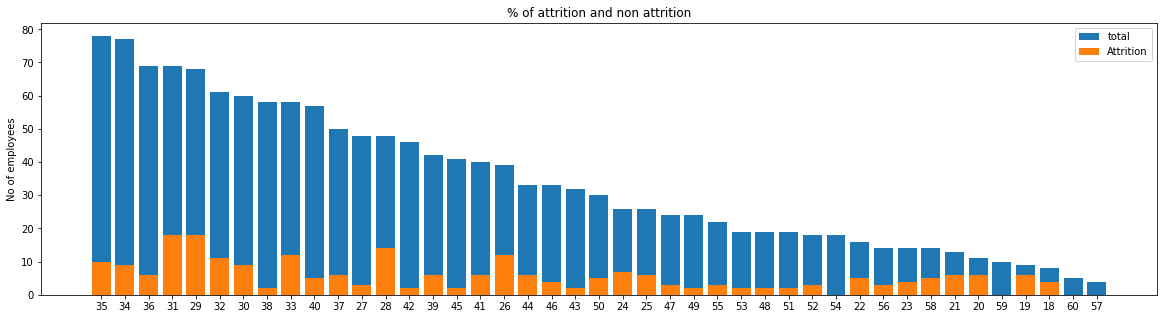

    Age  Attrition  total       Avg
17   35         10     78  0.128205
16   34          9     77  0.116883
18   36          6     69  0.086957
13   31         18     69  0.260870
11   29         18     68  0.264706
    Age  Attrition  total       Avg
41   59          0     10  0.000000
1    19          6      9  0.666667
0    18          4      8  0.500000
42   60          0      5  0.000000
39   57          0      4  0.000000


In [9]:
univariate_barplots(data, 'Age', 'Attrition', False)

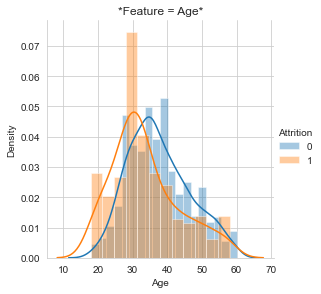

In [10]:
sns.set_style("whitegrid")
g=sns.FacetGrid(data, hue='Attrition', size=4)
g=g.map(sns.distplot, 'Age').add_legend().set(title='*Feature = Age*')
plt.show()


### Observation:

If you see, employees with age 31,29,28,26,20,21,19 have the great chances of attrition. 

The distribution of class label across the employee 'Age' is uneven and also there is significant overlap. 

Looking at PDF plot for feature 'Age' it can be seen that the chances of attrition are more in the age range 20 to 30 than non attrition. Even though Age may become a good feature to decide if the employee attrition will happen or not.

### Feature:DailyRate (Salary Level)

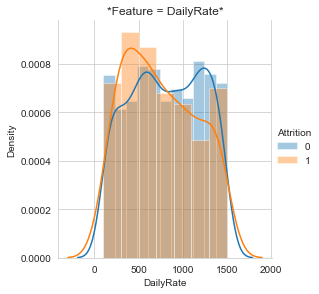

In [11]:
sns.set_style("whitegrid")
g=sns.FacetGrid(data, hue='Attrition', size=4)
g=g.map(sns.distplot, 'DailyRate').add_legend().set(title='*Feature = DailyRate*')
plt.show()

### Observation:

After looking at the distribution, we can see that when the Daily Rate is less there is high rate of Attrition, and as Daily rate increases Attrition reduces drastically. But still there is significant overlap of distributions between class labels, so it is difficult to decide Attrition - given feature 'Daily Rate'.

### Feature: EnvironmentSatisfaction (Satisfaction with the environment)

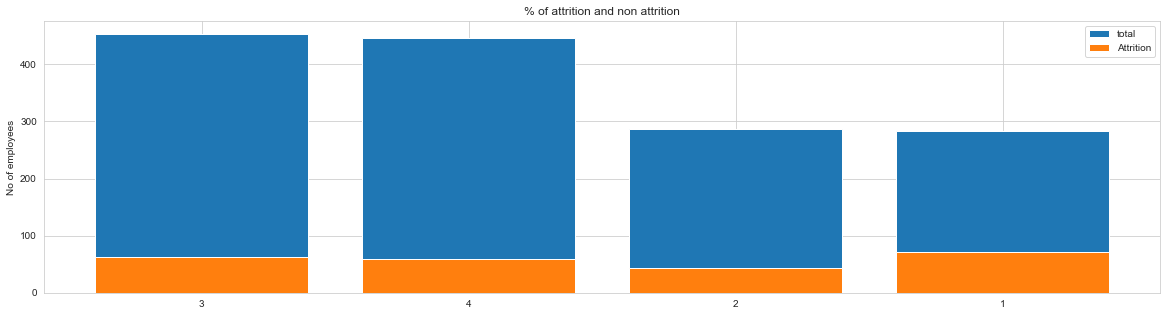

   EnvironmentSatisfaction  Attrition  total       Avg
2                        3         62    453  0.136865
3                        4         60    446  0.134529
1                        2         43    287  0.149826
0                        1         72    284  0.253521
   EnvironmentSatisfaction  Attrition  total       Avg
2                        3         62    453  0.136865
3                        4         60    446  0.134529
1                        2         43    287  0.149826
0                        1         72    284  0.253521


In [12]:
univariate_barplots(data, 'EnvironmentSatisfaction', 'Attrition', False)

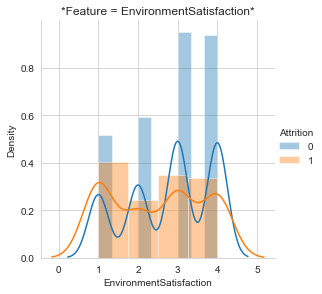

In [13]:
sns.set_style("whitegrid")
g=sns.FacetGrid(data, hue='Attrition', size=4)
g=g.map(sns.distplot, 'EnvironmentSatisfaction').add_legend().set(title='*Feature = EnvironmentSatisfaction*')
plt.show()

### Obeservation:

At satisfaction level of 1-2 there is high rate of attrition, compared to no attrition. So these can become a important feature.

### Feature: OverTime (Yes/No)

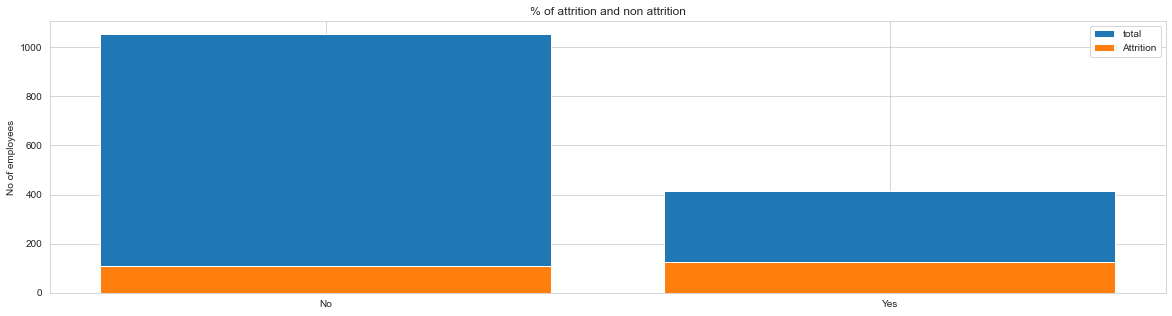

  OverTime  Attrition  total       Avg
0       No        110   1054  0.104364
1      Yes        127    416  0.305288
  OverTime  Attrition  total       Avg
0       No        110   1054  0.104364
1      Yes        127    416  0.305288


In [14]:
univariate_barplots(data, 'OverTime', 'Attrition', False)

### Observation:

If you see the distribution above, there are more number of attrition when employee do overtime. This feature will also help in classification.

### Feature: MaritalStatus

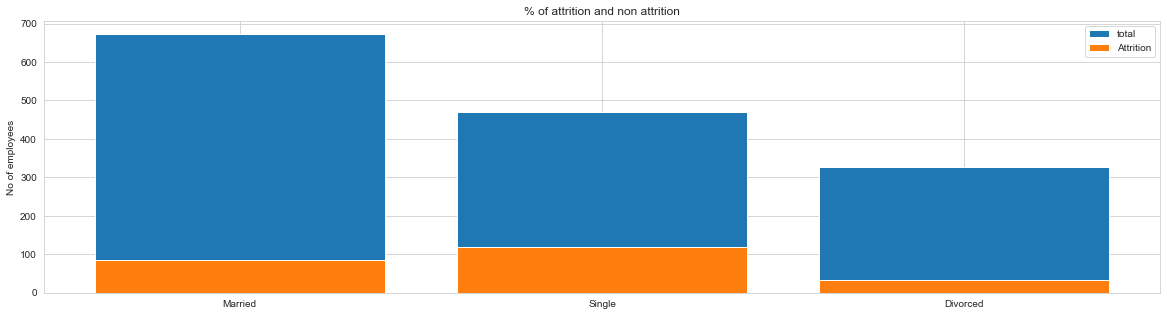

  MaritalStatus  Attrition  total       Avg
1       Married         84    673  0.124814
2        Single        120    470  0.255319
0      Divorced         33    327  0.100917
  MaritalStatus  Attrition  total       Avg
1       Married         84    673  0.124814
2        Single        120    470  0.255319
0      Divorced         33    327  0.100917


In [15]:
univariate_barplots(data, 'MaritalStatus', 'Attrition', False)

### Observation:

It can observed that Single employees have more attrition than Married. Divorced employees have the least attrition of all.
So this feature can be a good classifier.

## Insights:

Most of the features given in the dataset have uniform distribution of class labels across all their categorical values. Some of them are important like Age, Daily Rate, Enviornment Satisfaction, Marital Status and Over Time.

## Bivariate Analysis

Lets see if any two features can be able to classify the class labels:

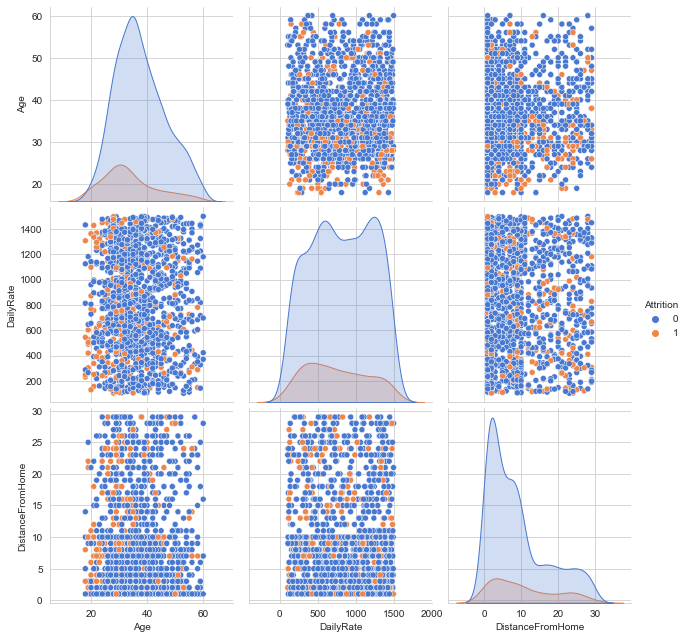

In [16]:
plt.close()
sns.pairplot(data.iloc[:,[0,1,2,3,4,5]], hue='Attrition', size=3, palette='muted')
plt.show()

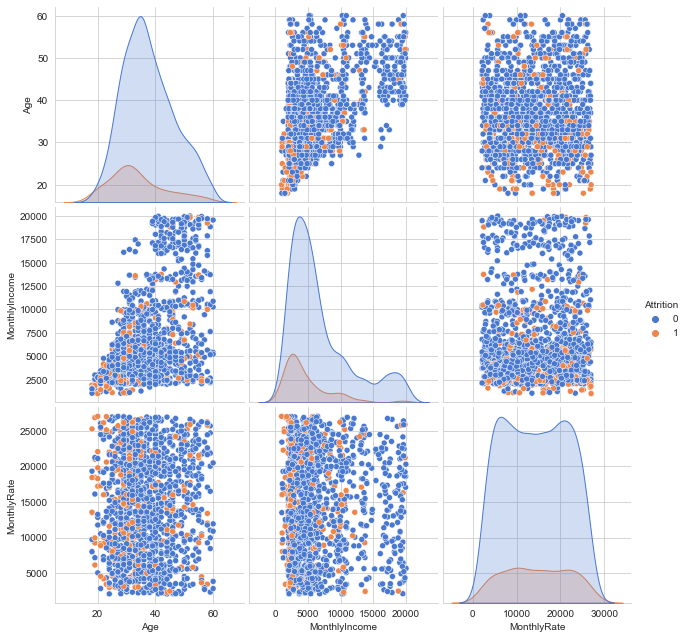

In [17]:
plt.close()
sns.pairplot(data.iloc[:,[0,1,17,18,19]],hue='Attrition', size=3, palette='muted')
plt.show()

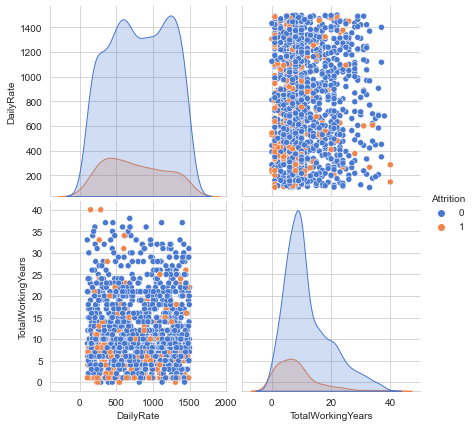

In [18]:
plt.close()
sns.pairplot(data.iloc[:,[1,2,3,4,28]],hue='Attrition', size=3, palette='muted')
plt.show()

### Observation:

Looking at the two variables combinely, we do not find much strong information using which class labels can be classified.

## Box plots

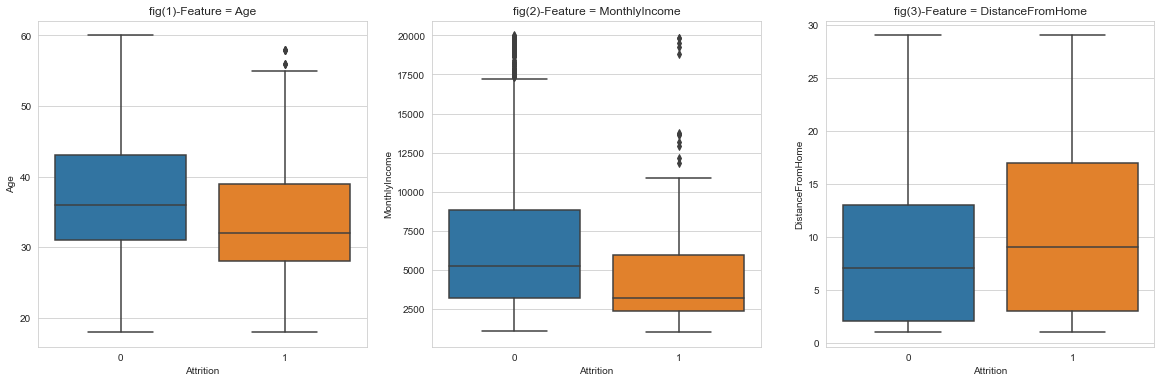

In [19]:
from matplotlib import gridspec     

fig=plt.figure(1)
fig.set_figheight(6)          
fig.set_figwidth(20)
plt.subplot(131)
sns.boxplot(x='Attrition', y='Age', data= data)
plt.title('fig(1)-Feature = Age')

# Feature = year
plt.subplot(132)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('fig(2)-Feature = MonthlyIncome')

#Feature = nodes
plt.subplot(133)
sns.boxplot(x='Attrition', y='DistanceFromHome', data= data)
plt.title('fig(3)-Feature = DistanceFromHome')

plt.show()

# Objectives and Constraints

1. Detect the employees which are more probable to resign/leave the organization. And achieve employee retention by implementing precautionary measures.

2. Employees who are more probable for attrition should be classified correctly and should not be classified incorrectly because if so, we will fail to achive retention of those incorrectly classified employees. It is okay if model classifies non-attrition employees as attrition because it will not affect employee retention. 

3. Mapping to Machine Learning problem, we want 'True_Positive'(True_label= Yes, Predicted_label= Yes) value to be high, 'False_Negative'(True_label= Yes, Predicted_label= No) value to be zero ideally, and it is acceptable if we get some 'False_Positive'(True_label= No, Predicted_label= Yes) value.

4. So, we need high Recall value.

# 1. Feature Engineering
## Numercial features= Normalization
## Categorical features= Label encoding

In [20]:
# We will remove features EmployeeCount, EmployeeNumber, Over18, and StandardHours as they have same value for each datapoint.

data= data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life_Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research_Development,8,1,Life_Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research_Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research_Development,3,4,Life_Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research_Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [21]:
# Seperating class labels from data
y = data['Attrition']

# Removing class labels from data
df= data.drop(['Attrition'], axis=1)
X = df

### LabelEncoding for categorical features

In [22]:
#Reference:https://hackernoon.com/a-machine-learning-approach-to-ibm-employee-attrition-and-performance-b5d87c5e2415

#Label Encoding for Categorical/Non-Numeric Data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X.iloc[:,1] = labelencoder_X_1.fit_transform(X.iloc[:,1])
X.iloc[:,3] = labelencoder_X_1.fit_transform(X.iloc[:,3])
X.iloc[:,6] = labelencoder_X_1.fit_transform(X.iloc[:,6])
X.iloc[:,8] = labelencoder_X_1.fit_transform(X.iloc[:,8])
X.iloc[:,12] = labelencoder_X_1.fit_transform(X.iloc[:,12])
X.iloc[:,14] = labelencoder_X_1.fit_transform(X.iloc[:,14])
X.iloc[:,18] = labelencoder_X_1.fit_transform(X.iloc[:,18])
y = labelencoder_X_1.fit_transform(y)

In [23]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


### Train - Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
print(X_cv.shape,y_cv.shape)

(1190, 30) (1190,)
(147, 30) (147,)
(133, 30) (133,)


### Normalization for numerical features

In [25]:
import numpy as np
from sklearn.preprocessing import Normalizer
# create dataframe with Age, DistanceFromHome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,YearsWithCurrManager  
X_train_temp = X_train[['Age', 'DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X_test_temp = X_test[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X_cv_temp = X_cv[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

norm = Normalizer()
norm.fit(X_train_temp)

X_train[['Age', 'DailyRate','HourlyRate','MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']] = norm.transform(X_train_temp)

X_test[['Age', 'DailyRate','HourlyRate','MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]= norm.transform(X_test_temp)

X_cv[['Age', 'DailyRate','HourlyRate','MonthlyIncome','MonthlyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 
         'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]= norm.transform(X_cv_temp)


In [26]:
X_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
374,0.001308,2,0.014201,2,0.000420,4,1,2,1,0.004298,...,3,4,0,0.000327,1,3,0.000327,0.000234,0.000000,0.000327
1116,0.001818,2,0.022648,2,0.000860,5,2,3,1,0.001984,...,4,3,1,0.001190,3,3,0.001190,0.000198,0.000066,0.000430
1415,0.001604,0,0.063802,1,0.000049,2,3,2,1,0.002867,...,3,3,3,0.000049,2,2,0.000049,0.000049,0.000000,0.000000
641,0.002900,1,0.034347,2,0.000453,2,1,2,1,0.004350,...,3,4,1,0.000906,3,3,0.000906,0.000725,0.000453,0.000272
1064,0.001927,2,0.021196,0,0.000064,3,1,3,1,0.002955,...,4,1,1,0.000385,3,4,0.000321,0.000193,0.000064,0.000193


In [27]:
X_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
785,0.001403,2,0.052319,1,0.000701,4,5,1,1,0.002139,...,4,4,1,0.000491,6,3,0.000386,0.000351,0.000386,0.000035
427,0.005577,1,0.139333,2,0.002603,3,2,3,0,0.007436,...,3,4,0,0.002045,5,4,0.001673,0.001208,0.001208,0.001022
630,0.001113,2,0.062213,1,0.000051,2,1,4,1,0.001669,...,4,1,2,0.000202,2,1,0.000101,0.000101,0.000101,0.000101
1115,0.001527,2,0.021513,1,0.000314,4,3,1,1,0.001572,...,3,3,0,0.000045,4,1,0.000045,0.000000,0.000000,0.000000
1410,0.005625,2,0.062438,2,0.000281,2,2,2,0,0.012938,...,3,3,1,0.002109,4,3,0.001547,0.001125,0.000703,0.001406


In [28]:
X_cv.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
791,0.002475,2,0.085126,2,0.000283,3,5,4,1,0.006080,...,4,1,0,0.000636,2,3,0.000566,0.000495,0.000283,0.000495
563,0.001057,2,0.037342,2,0.001100,1,3,3,0,0.001353,...,4,2,0,0.000254,5,2,0.000254,0.000211,0.000042,0.000169
1246,0.003003,1,0.060051,0,0.000801,3,0,3,0,0.006606,...,3,3,1,0.000601,0,2,0.000400,0.000200,0.000100,0.000200
454,0.001258,2,0.010068,1,0.000825,3,5,4,1,0.001475,...,3,2,2,0.000347,2,4,0.000130,0.000087,0.000043,0.000087
922,0.001693,2,0.046144,1,0.000154,2,1,3,1,0.003541,...,3,4,2,0.001001,4,2,0.000962,0.000346,0.000539,0.000500


# Model Training- Logistic Regression

## Hyperparameter Tuninig

log_loss for c =  1e-05 is 0.38889027708773666
log_loss for c =  0.0001 is 0.3827716892301025
log_loss for c =  0.001 is 0.35619797688305493
log_loss for c =  0.01 is 0.3351118555650766
log_loss for c =  0.1 is 0.3414762055956342
log_loss for c =  1 is 0.3472488824335644
log_loss for c =  10 is 0.34548023050765336
log_loss for c =  100 is 0.3474001557191069
log_loss for c =  1000 is 0.3470638814016831


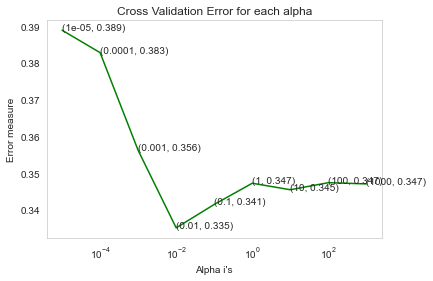


 best_aplha =  0.01


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid",ensemble=False)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xscale("log")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

print('\n best_aplha = ',alpha[best_alpha])

## Training on best parameters

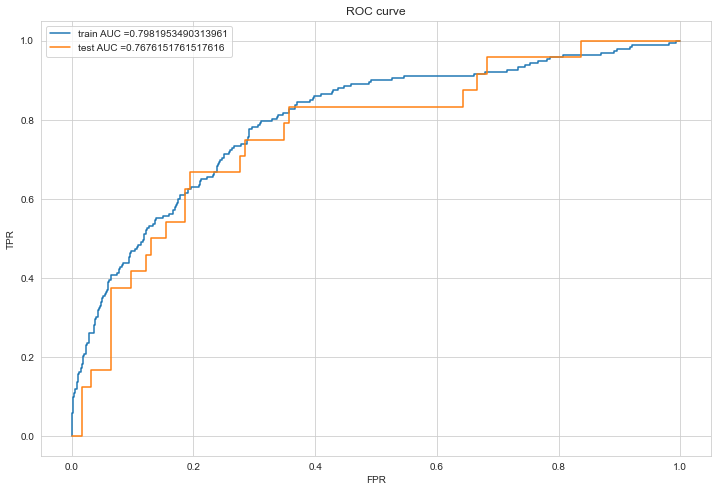

Confusion matrix


Text(0.5, 1.0, 'Confusion Matrix')

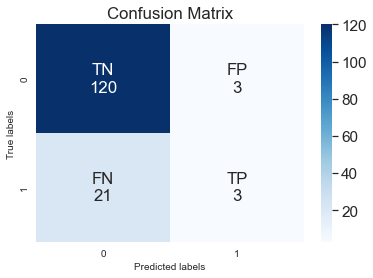

<Figure size 216x216 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid",ensemble=False)
sig_clf.fit(X_train, y_train)

y_train_pred= sig_clf.predict_proba(X_train)[:,1]
y_test_pred= sig_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (12,8))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

y_pred= [1 if i>0.5 else 0 for i in y_test_pred]

from sklearn.metrics import confusion_matrix         
ax=plt.subplot()
plt.figure(figsize = (3,3))
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix")
sns.set(font_scale=1.4)
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip (group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)       # to convert into array
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

ax.set_title('Confusion Matrix')

# Model Training- Decision Tree

## Hyperparameter Tuninig

log_loss for max_depth =  1 is 0.42663031288932374
log_loss for max_depth =  5 is 0.3818361217982563
log_loss for max_depth =  10 is 0.3858824773756449
log_loss for max_depth =  50 is 0.386977380698164


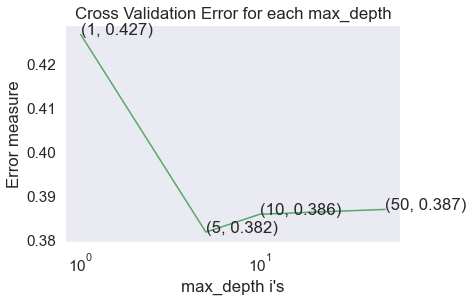


 best max_depth =  5


In [31]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint

max_depth= [1, 5, 10, 50]

cv_log_error_array=[]
for i in max_depth:
    decesion_tree = DecisionTreeClassifier(max_depth=i, min_samples_split=100)
    decesion_tree.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(decesion_tree, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=decesion_tree.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for max_depth = ',max_depth[i],'is',cv_log_error_array[i])

best_depth = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(max_depth, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each max_depth")
plt.xscale("log")
plt.xlabel("max_depth i's")
plt.ylabel("Error measure")
plt.show()

print('\n best max_depth = ',max_depth[best_depth])

## Training on best parameters

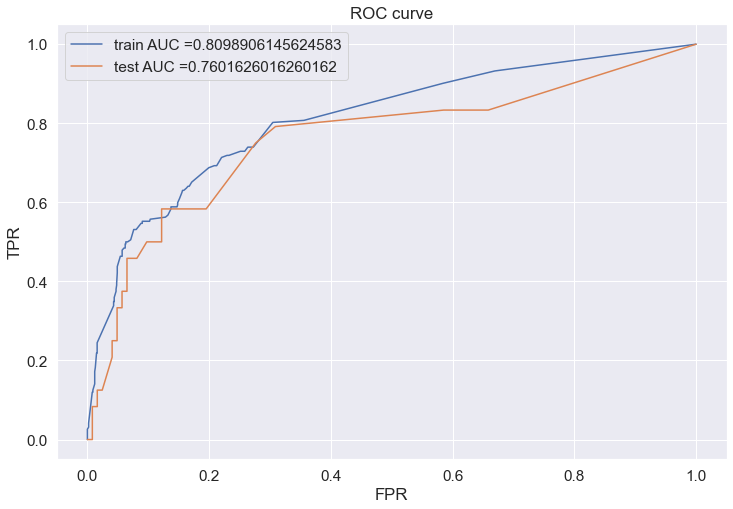

Confusion matrix


Text(0.5, 1.0, 'Confusion Matrix')

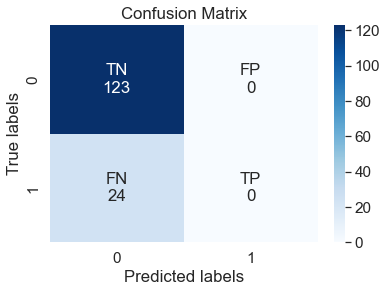

<Figure size 216x216 with 0 Axes>

In [32]:
decesion_tree = DecisionTreeClassifier(max_depth=max_depth[best_depth], min_samples_split=100)
decesion_tree.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(decesion_tree, method="sigmoid")
sig_clf.fit(X_train, y_train)

y_train_pred= sig_clf.predict_proba(X_train)[:,1]
y_test_pred= sig_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (12,8))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

y_pred= [1 if i>0.5 else 0 for i in y_test_pred]

from sklearn.metrics import confusion_matrix         
ax=plt.subplot()
plt.figure(figsize = (3,3))
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix")
sns.set(font_scale=1.4)
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip (group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)       # to convert into array
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

ax.set_title('Confusion Matrix')

# Model Training- SVC

## Hyperparameter Tuninig

log_loss for c =  1e-05 is 0.436174115875389
log_loss for c =  0.0001 is 0.4362942797622428
log_loss for c =  0.001 is 5.4534910097227405
log_loss for c =  0.01 is 0.43624284805215496
log_loss for c =  0.1 is 0.3807242294162113
log_loss for c =  1 is 0.3294243605001017
log_loss for c =  10 is 0.32393135523551414
log_loss for c =  100 is 0.3412095902540337
log_loss for c =  1000 is 0.3602368500733633


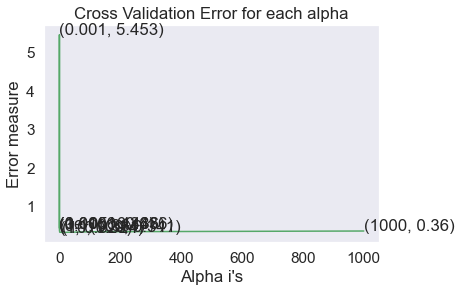


 best_aplha =  10


In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

aplha=[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

cv_log_error_array=[]
for i in alpha:
    svc = SVC(C=i, kernel='rbf',class_weight='balanced')
    svc.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(svc, method="sigmoid",ensemble=False)
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=svc.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

print('\n best_aplha = ',alpha[best_alpha])


## Training on best parameters

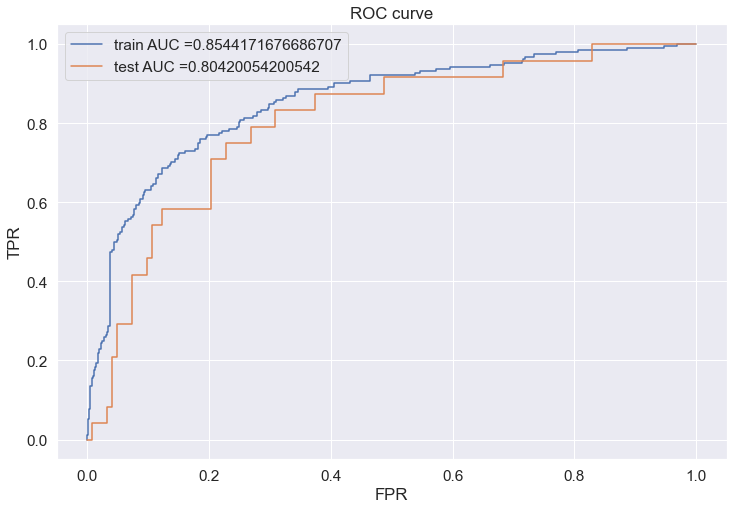

Confusion matrix


Text(0.5, 1.0, 'Confusion Matrix')

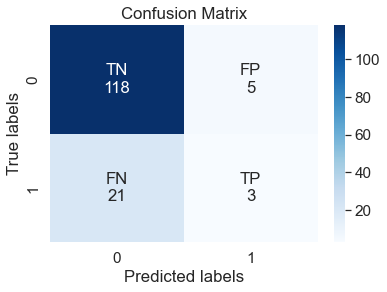

<Figure size 216x216 with 0 Axes>

In [34]:
svc = SVC(C=alpha[best_alpha], kernel='rbf',class_weight='balanced')
svc.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(svc, method="sigmoid",ensemble=False)
sig_clf.fit(X_train, y_train)

y_train_pred= sig_clf.predict_proba(X_train)[:,1]
y_test_pred= sig_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (12,8))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

y_pred= [1 if i>0.5 else 0 for i in y_test_pred]

from sklearn.metrics import confusion_matrix         
ax=plt.subplot()
plt.figure(figsize = (3,3))
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix")
sns.set(font_scale=1.4)
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip (group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)       # to convert into array
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

ax.set_title('Confusion Matrix')

# Model Training- XGBoost

## Hyperparameter tuning

log_loss for c =  10 is 0.35060476526142753
log_loss for c =  50 is 0.354210119017045
log_loss for c =  100 is 0.3541065274833318
log_loss for c =  500 is 0.3566773892891561
log_loss for c =  1000 is 0.35725424536573924
log_loss for c =  2000 is 0.36021071151571576
log_loss for c =  3000 is 0.3622547061093036


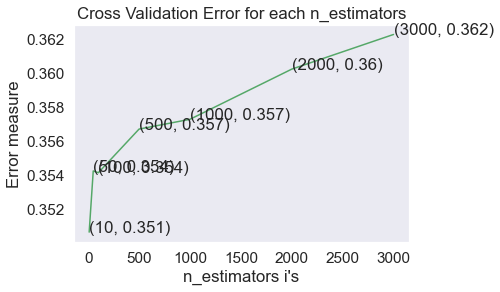


 best n_estimators =  10


In [35]:
from xgboost import XGBClassifier

n_estimators=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in n_estimators:
    xgb=XGBClassifier(n_estimators=i,nthread=-1,verbosity = 0)
    xgb.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=xgb.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',n_estimators[i],'is',cv_log_error_array[i])


best_n_estimators = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(n_estimators, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((n_estimators[i],np.round(txt,3)), (n_estimators[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each n_estimators")
plt.xlabel("n_estimators i's")
plt.ylabel("Error measure")
plt.show()

print('\n best n_estimators = ',n_estimators[best_n_estimators])

## Training on best parameters

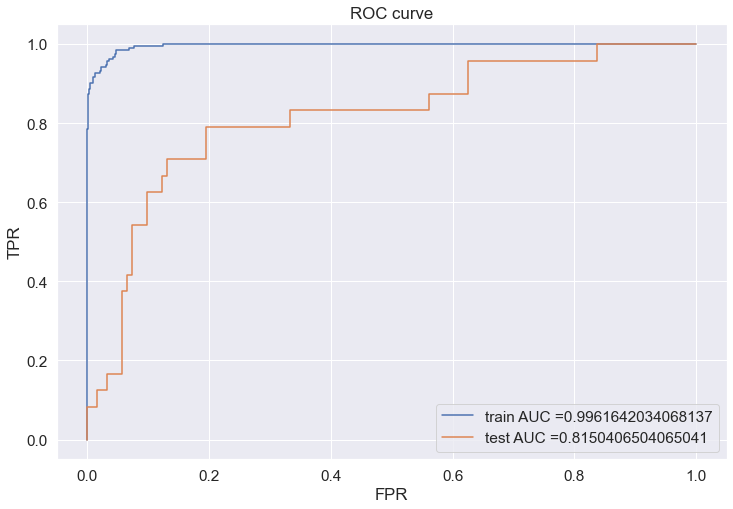

Confusion matrix


Text(0.5, 1.0, 'Confusion Matrix')

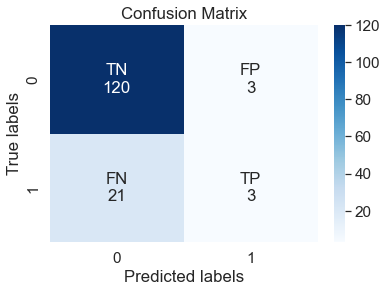

<Figure size 216x216 with 0 Axes>

In [36]:
xgb=XGBClassifier(n_estimators= n_estimators[best_n_estimators],nthread=-1,verbosity = 0)
xgb.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(xgb, method="sigmoid")
sig_clf.fit(X_train, y_train)

y_train_pred= sig_clf.predict_proba(X_train)[:,1]
y_test_pred= sig_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (12,8))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

y_pred= [1 if i>0.5 else 0 for i in y_test_pred]

from sklearn.metrics import confusion_matrix         
ax=plt.subplot()
plt.figure(figsize = (3,3))
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix")
sns.set(font_scale=1.4)
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip (group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)       # to convert into array
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

ax.set_title('Confusion Matrix')

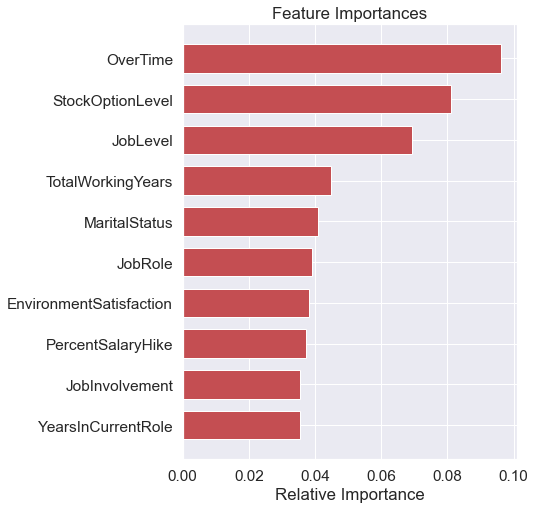

In [37]:
features = X_train.columns
importances = xgb.feature_importances_
indices = (np.argsort(importances))[-10:]
plt.figure(figsize=(6,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],height=0.7, color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 2. Feature Engineering
## Numercial features= Normalization
## Categorical features= One hot encoding

### Splitting the data to train, cross validation and test

In [38]:
y = data['Attrition']

# Removing class labels from data
df= data.drop(['Attrition'], axis=1)
X = df

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1323, 30) (1323,)
(147, 30) (147,)


### Categorical features

BusinessTravel - *One Hot encoding*                                    

Department - *One Hot encoding*

Education - *One Hot encoding*

EducationField - *One Hot encoding*

EnvironmentSatisfaction - *One Hot encoding*

Gender - *One Hot encoding*

JobInvolvement - *One Hot encoding*

JobLevel - *One Hot encoding*

JobRole - *One Hot encoding*

JobSatisfaction - *One Hot encoding*

MaritalStatus - *One Hot encoding*

OverTime - *One Hot encoding*

PerformanceRating - *One Hot encoding*

RelationshipSatisfaction - *One Hot encoding*

StockOptionLevel - *One Hot encoding*

TrainingTimesLastYear - *One Hot encoding*

WorkLifeBalance - *One Hot encoding*


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

### 1) BusinessTravel 

In [40]:
vectorizer1 =CountVectorizer(binary=True)
vectorizer1.fit(X_train['BusinessTravel'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_BusinessTravel_ohe = vectorizer1.transform(X_train['BusinessTravel'].values)
X_test_BusinessTravel_ohe = vectorizer1.transform(X_test['BusinessTravel'].values)

print("After vectorizations")
print(X_train_BusinessTravel_ohe.shape, y_train.shape)
print(X_test_BusinessTravel_ohe.shape, y_test.shape)
print(vectorizer1.get_feature_names())
print("="*100)
print(X_train_BusinessTravel_ohe[0].shape)

After vectorizations
(1323, 3) (1323,)
(147, 3) (147,)
['non_travel', 'travel_frequently', 'travel_rarely']
(1, 3)


### 2) Department

In [41]:
vectorizer2 =CountVectorizer(binary=True)
vectorizer2.fit(X_train['Department'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Department_ohe = vectorizer2.transform(X_train['Department'].values)
X_test_Department_ohe = vectorizer2.transform(X_test['Department'].values)

print("After vectorizations")
print(X_train_Department_ohe.shape, y_train.shape)
print(X_test_Department_ohe.shape, y_test.shape)
print(vectorizer2.get_feature_names())
print("="*100)
print(X_train_Department_ohe[0].shape)

After vectorizations
(1323, 3) (1323,)
(147, 3) (147,)
['human_resources', 'research_development', 'sales']
(1, 3)


### 3) Education

In [42]:
vectorizer3 =OneHotEncoder(sparse=False)
vectorizer3.fit(X_train['Education'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Education_ohe = vectorizer3.transform(X_train['Education'].values.reshape(-1, 1))
X_test_Education_ohe = vectorizer3.transform(X_test['Education'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_Education_ohe.shape, y_train.shape)
print(X_test_Education_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)
print(X_train_Education_ohe[0].shape)

After vectorizations
(1323, 5) (1323,)
(147, 5) (147,)
['x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5']
(5,)


### 4) EducationField

In [43]:
vectorizer4 =CountVectorizer(binary=True)
vectorizer4.fit(X_train['EducationField'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_EducationField_ohe = vectorizer4.transform(X_train['EducationField'].values)
X_test_EducationField_ohe = vectorizer4.transform(X_test['EducationField'].values)

print("After vectorizations")
print(X_train_EducationField_ohe.shape, y_train.shape)
print(X_test_EducationField_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)
print(X_train_EducationField_ohe[0].shape)

After vectorizations
(1323, 6) (1323,)
(147, 6) (147,)
['human_resources', 'life_sciences', 'marketing', 'medical', 'other', 'technical_degree']
(1, 6)


### 5) EnvironmentSatisfaction

In [44]:
vectorizer5 =OneHotEncoder(sparse=False)
vectorizer5.fit(X_train['EnvironmentSatisfaction'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_EnvSat_ohe = vectorizer5.transform(X_train['EnvironmentSatisfaction'].values.reshape(-1, 1))
X_test_EnvSat_ohe = vectorizer5.transform(X_test['EnvironmentSatisfaction'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_EnvSat_ohe.shape, y_train.shape)
print(X_test_EnvSat_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)
print(X_train_EnvSat_ohe[0].shape)

After vectorizations
(1323, 4) (1323,)
(147, 4) (147,)
['x0_1' 'x0_2' 'x0_3' 'x0_4']
(4,)


### 6) Gender 

In [45]:
vectorizer6 =CountVectorizer(binary=True)
vectorizer6.fit(X_train['Gender'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_Gender_ohe = vectorizer6.transform(X_train['Gender'].values)
X_test_Gender_ohe = vectorizer6.transform(X_test['Gender'].values)

print("After vectorizations")
print(X_train_Gender_ohe.shape, y_train.shape)
print(X_test_Gender_ohe.shape, y_test.shape)
print(vectorizer6.get_feature_names())
print("="*100)
print(X_train_Gender_ohe[0].shape)

After vectorizations
(1323, 2) (1323,)
(147, 2) (147,)
['female', 'male']
(1, 2)


### 7) JobInvolvement

In [46]:
vectorizer7 =OneHotEncoder(sparse=False)
vectorizer7.fit(X_train['JobInvolvement'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_JobInvolvement_ohe = vectorizer7.transform(X_train['JobInvolvement'].values.reshape(-1, 1))
X_test_JobInvolvement_ohe = vectorizer7.transform(X_test['JobInvolvement'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_JobInvolvement_ohe.shape, y_train.shape)
print(X_test_JobInvolvement_ohe.shape, y_test.shape)
print(vectorizer7.get_feature_names())
print("="*100)
print(X_train_JobInvolvement_ohe[0].shape)

After vectorizations
(1323, 4) (1323,)
(147, 4) (147,)
['x0_1' 'x0_2' 'x0_3' 'x0_4']
(4,)


### 8) JobLevel 

In [47]:
vectorizer8 =OneHotEncoder(sparse=False)
vectorizer8.fit(X_train['JobLevel'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_JobLevel_ohe = vectorizer8.transform(X_train['JobLevel'].values.reshape(-1, 1))
X_test_JobLevel_ohe = vectorizer8.transform(X_test['JobLevel'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_JobLevel_ohe.shape, y_train.shape)
print(X_test_JobLevel_ohe.shape, y_test.shape)
print(vectorizer8.get_feature_names())
print("="*100)
print(X_train_JobLevel_ohe[0].shape)

After vectorizations
(1323, 5) (1323,)
(147, 5) (147,)
['x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5']
(5,)


### 9) JobRole

In [48]:
vectorizer9 =CountVectorizer(binary=True)
vectorizer9.fit(X_train['JobRole'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_JobRole_ohe = vectorizer9.transform(X_train['JobRole'].values)
X_test_JobRole_ohe = vectorizer9.transform(X_test['JobRole'].values)

print("After vectorizations")
print(X_train_JobRole_ohe.shape, y_train.shape)
print(X_test_JobRole_ohe.shape, y_test.shape)
print(vectorizer9.get_feature_names())
print("="*100)
print(X_train_JobRole_ohe[0].shape)

After vectorizations
(1323, 9) (1323,)
(147, 9) (147,)
['healthcare_representative', 'human_resources', 'laboratory_technician', 'manager', 'manufacturing_director', 'research_director', 'research_scientist', 'sales_executive', 'sales_representative']
(1, 9)


### 10) JobSatisfaction 

In [49]:
vectorizer10 =OneHotEncoder(sparse=False)
vectorizer10.fit(X_train['JobSatisfaction'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_JobSat_ohe = vectorizer10.transform(X_train['JobSatisfaction'].values.reshape(-1, 1))
X_test_JobSat_ohe = vectorizer10.transform(X_test['JobSatisfaction'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_JobSat_ohe.shape, y_train.shape)
print(X_test_JobSat_ohe.shape, y_test.shape)
print(vectorizer10.get_feature_names())
print("="*100)
print(X_train_JobSat_ohe[0].shape)

After vectorizations
(1323, 4) (1323,)
(147, 4) (147,)
['x0_1' 'x0_2' 'x0_3' 'x0_4']
(4,)


### 11) MaritalStatus

In [50]:
vectorizer11 =CountVectorizer(binary=True)
vectorizer11.fit(X_train['MaritalStatus'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_MaritalStatus_ohe = vectorizer11.transform(X_train['MaritalStatus'].values)
X_test_MaritalStatus_ohe = vectorizer11.transform(X_test['MaritalStatus'].values)

print("After vectorizations")
print(X_train_MaritalStatus_ohe.shape, y_train.shape)
print(X_test_MaritalStatus_ohe.shape, y_test.shape)
print(vectorizer11.get_feature_names())
print("="*100)
print(X_train_MaritalStatus_ohe[0].shape)

After vectorizations
(1323, 3) (1323,)
(147, 3) (147,)
['divorced', 'married', 'single']
(1, 3)


### 12) OverTime 

In [51]:
vectorizer12 =CountVectorizer(binary=True)
vectorizer12.fit(X_train['OverTime'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_OverTime_ohe = vectorizer12.transform(X_train['OverTime'].values)
X_test_OverTime_ohe = vectorizer12.transform(X_test['OverTime'].values)

print("After vectorizations")
print(X_train_OverTime_ohe.shape, y_train.shape)
print(X_test_OverTime_ohe.shape, y_test.shape)
print(vectorizer12.get_feature_names())
print("="*100)
print(X_train_OverTime_ohe[0].shape)

After vectorizations
(1323, 2) (1323,)
(147, 2) (147,)
['no', 'yes']
(1, 2)


### 13) PerformanceRating

In [52]:
vectorizer13 =OneHotEncoder(sparse=False)
vectorizer13.fit(X_train['PerformanceRating'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_PerfRat_ohe = vectorizer13.transform(X_train['PerformanceRating'].values.reshape(-1, 1))
X_test_PerfRat_ohe = vectorizer13.transform(X_test['PerformanceRating'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_PerfRat_ohe.shape, y_train.shape)
print(X_test_PerfRat_ohe.shape, y_test.shape)
print(vectorizer13.get_feature_names())
print("="*100)
print(X_train_PerfRat_ohe[0].shape)

After vectorizations
(1323, 2) (1323,)
(147, 2) (147,)
['x0_3' 'x0_4']
(2,)


### 14) RelationshipSatisfaction

In [53]:
vectorizer14 =OneHotEncoder(sparse=False)
vectorizer14.fit(X_train['RelationshipSatisfaction'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_RelSat_ohe = vectorizer14.transform(X_train['RelationshipSatisfaction'].values.reshape(-1, 1))
X_test_RelSat_ohe = vectorizer14.transform(X_test['RelationshipSatisfaction'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_RelSat_ohe.shape, y_train.shape)
print(X_test_RelSat_ohe.shape, y_test.shape)
print(vectorizer14.get_feature_names())
print("="*100)
print(X_train_RelSat_ohe[0].shape)

After vectorizations
(1323, 4) (1323,)
(147, 4) (147,)
['x0_1' 'x0_2' 'x0_3' 'x0_4']
(4,)


### 15) StockOptionLevel

In [54]:
vectorizer15 =OneHotEncoder(sparse=False)
vectorizer15.fit(X_train['StockOptionLevel'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_StockOpt_ohe = vectorizer15.transform(X_train['StockOptionLevel'].values.reshape(-1, 1))
X_test_StockOpt_ohe = vectorizer15.transform(X_test['StockOptionLevel'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_StockOpt_ohe.shape, y_train.shape)
print(X_test_StockOpt_ohe.shape, y_test.shape)
print(vectorizer15.get_feature_names())
print("="*100)
print(X_train_StockOpt_ohe[0].shape)

After vectorizations
(1323, 4) (1323,)
(147, 4) (147,)
['x0_0' 'x0_1' 'x0_2' 'x0_3']
(4,)


### 16) TrainingTimesLastYear

In [55]:
vectorizer16 =OneHotEncoder(sparse=False)
vectorizer16.fit(X_train['TrainingTimesLastYear'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_TrainTime_ohe = vectorizer16.transform(X_train['TrainingTimesLastYear'].values.reshape(-1, 1))
X_test_TrainTime_ohe = vectorizer16.transform(X_test['TrainingTimesLastYear'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_TrainTime_ohe.shape, y_train.shape)
print(X_test_TrainTime_ohe.shape, y_test.shape)
print(vectorizer16.get_feature_names())
print("="*100)
print(X_train_TrainTime_ohe[0].shape)

After vectorizations
(1323, 7) (1323,)
(147, 7) (147,)
['x0_0' 'x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6']
(7,)


### 17) WorkLifeBalance

In [56]:
vectorizer17 =OneHotEncoder(sparse=False)
vectorizer17.fit(X_train['WorkLifeBalance'].values.reshape(-1, 1)) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_WorkLifeBal_ohe = vectorizer17.transform(X_train['WorkLifeBalance'].values.reshape(-1, 1))
X_test_WorkLifeBal_ohe = vectorizer17.transform(X_test['WorkLifeBalance'].values.reshape(-1, 1))

print("After vectorizations")
print(X_train_WorkLifeBal_ohe.shape, y_train.shape)
print(X_test_WorkLifeBal_ohe.shape, y_test.shape)
print(vectorizer17.get_feature_names())
print("="*100)
print(X_train_WorkLifeBal_ohe[0].shape)

After vectorizations
(1323, 4) (1323,)
(147, 4) (147,)
['x0_1' 'x0_2' 'x0_3' 'x0_4']
(4,)


In [57]:
from scipy.sparse import hstack
import numpy as np
X_train_df1 = hstack((X_train_BusinessTravel_ohe,X_train_Department_ohe,X_train_Education_ohe,X_train_EducationField_ohe,X_train_EnvSat_ohe,
                     X_train_Gender_ohe,X_train_JobInvolvement_ohe,X_train_JobLevel_ohe,X_train_JobRole_ohe,X_train_JobSat_ohe,
                     X_train_MaritalStatus_ohe,X_train_OverTime_ohe,X_train_PerfRat_ohe,X_train_RelSat_ohe,X_train_StockOpt_ohe,X_train_TrainTime_ohe,X_train_WorkLifeBal_ohe)).todense()
X_test_df1 = hstack((X_test_BusinessTravel_ohe,X_test_Department_ohe,X_test_Education_ohe,X_test_EducationField_ohe,X_test_EnvSat_ohe,
                    X_test_Gender_ohe,X_test_JobInvolvement_ohe,X_test_JobLevel_ohe,X_test_JobRole_ohe,X_test_JobSat_ohe,
                    X_test_MaritalStatus_ohe,X_test_OverTime_ohe,X_test_PerfRat_ohe,X_test_RelSat_ohe,X_test_StockOpt_ohe,X_test_TrainTime_ohe,X_test_WorkLifeBal_ohe)).todense()

X_train_df1= np.squeeze(np.asarray(X_train_df1))
X_test_df1= np.squeeze(np.asarray(X_test_df1))
print("Final Data matrix")
print(X_train_df1.shape, y_train.shape)
print(X_test_df1.shape, y_test.shape)
print("="*100)
print(type(X_train_df1))

Final Data matrix
(1323, 71) (1323,)
(147, 71) (147,)
<class 'numpy.ndarray'>


### Numeric features

Age - *As it is*

DailyRate - *Feature Standardization*

DistanceFromHome - *As it is*

HourlyRate - *Feature Standardization*

MonthlyIncome - *Feature Standardization*

MonthlyRate - *Feature Standardization*

NumCompaniesWorked - *As it is*

PercentSalaryHike - *Feature Standardization*

TotalWorkingYears - *As it is*

YearsAtCompany - *As it is*

YearsInCurrentRole - *As it is*

YearsSinceLastPromotion - *As it is*

YearsWithCurrManager - *As it is*

In [58]:
import numpy as np
from sklearn.preprocessing import Normalizer
# create dataframe with Age, DistanceFromHome, NumCompaniesWorked, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,YearsWithCurrManager  
X_train_df2 = np.column_stack((X_train.Age, X_train.DistanceFromHome, X_train.NumCompaniesWorked, X_train.TotalWorkingYears, X_train.YearsAtCompany, X_train.YearsInCurrentRole, X_train.YearsSinceLastPromotion, X_train.YearsWithCurrManager))
X_test_df2 = np.column_stack((X_test.Age, X_test.DistanceFromHome, X_test.NumCompaniesWorked, X_test.TotalWorkingYears, X_test.YearsAtCompany, X_test.YearsInCurrentRole, X_test.YearsSinceLastPromotion, X_test.YearsWithCurrManager))

norm = Normalizer()
norm.fit(X_train_df2)

X_train_df2= norm.transform(X_train_df2)
X_test_df2= norm.transform(X_test_df2)

print(X_train_df2[0])
print(X_train_df2.shape)
print(X_test_df2.shape)
print(type(X_train_df2))

[0.83124864 0.04889698 0.14669094 0.31783036 0.26893338 0.2200364
 0.12224245 0.2200364 ]
(1323, 8)
(147, 8)
<class 'numpy.ndarray'>


In [59]:
# we will do Mean centering and scaling (Standardization) on rest of the features

X_train_temp = X_train[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike']].values
X_test_temp = X_test[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike']].values

from sklearn.preprocessing import StandardScaler
norm1 = Normalizer()
norm1.fit(X_train_temp)

X_train_df3 = norm1.transform(X_train_temp)
X_test_df3 = norm1.transform(X_test_temp)
print(X_train_df3[0])
print(X_train_df3.shape)
print(X_test_df3.shape)
print(type(X_train_df3))

[1.92392367e-02 3.43850188e-03 2.43847091e-01 9.69616595e-01
 5.32149100e-04]
(1323, 5)
(147, 5)
<class 'numpy.ndarray'>


### Concatenating all sub-dataframes

In [60]:
X_train_prep = np.concatenate((X_train_df1, X_train_df2, X_train_df3),axis=1)
X_test_prep = np.concatenate((X_test_df1, X_test_df2, X_test_df3),axis=1)

print(X_train_prep.shape)
print(X_test_prep.shape)

(1323, 84)
(147, 84)


# Model Training- Logistic Regression

## Hyperparameter Tuninig

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

parameters= {'C': [10 ** x for x in range(-5, 4)]}
classifier= LogisticRegression(class_weight='balanced')
clf= GridSearchCV(classifier, parameters, cv=3, scoring='roc_auc',return_train_score=True)

clf.fit(X_train_prep, y_train)
clf.best_params_

{'C': 0.1}

## Training on best parameters

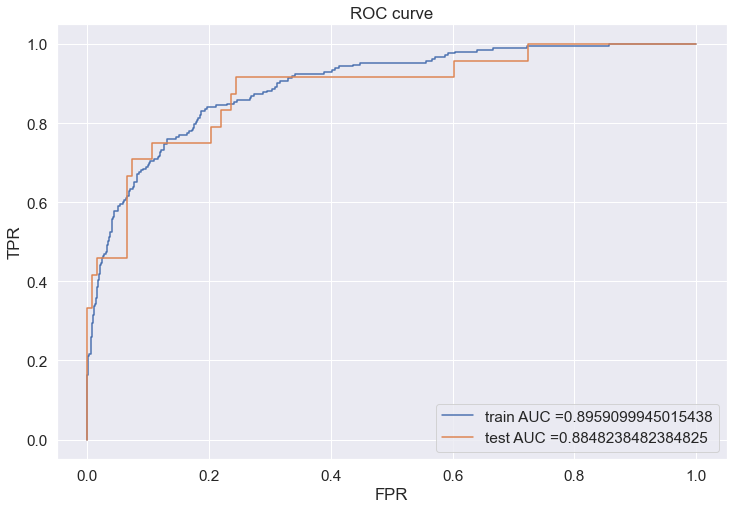

Confusion matrix


Text(0.5, 1.0, 'Confusion Matrix')

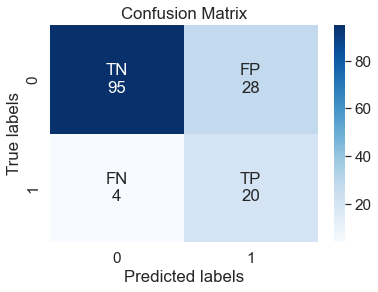

<Figure size 216x216 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

logreg= LogisticRegression(C=10,class_weight='balanced')
logreg.fit(X_train_prep, y_train)

y_train_pred= logreg.predict_proba(X_train_prep)[:,1]
y_test_pred= logreg.predict_proba(X_test_prep)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (12,8))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor

y_pred= [1 if i>0.5 else 0 for i in y_test_pred]

from sklearn.metrics import confusion_matrix         
ax=plt.subplot()
plt.figure(figsize = (3,3))
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix")
sns.set(font_scale=1.4)
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip (group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)       # to convert into array
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

ax.set_title('Confusion Matrix')

# Model Training- Decision Tree

## Hyperparameter Tuninig

In [63]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
parameters={'max_depth': [1, 5, 10, 50], 'min_samples_split':[5, 10, 100, 500]}

decesion_tree = DecisionTreeClassifier()
clf2 = GridSearchCV(decesion_tree, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf2.fit(X_train_prep, y_train)

clf2.best_params_

{'max_depth': 50, 'min_samples_split': 100}

## Training on best parameters

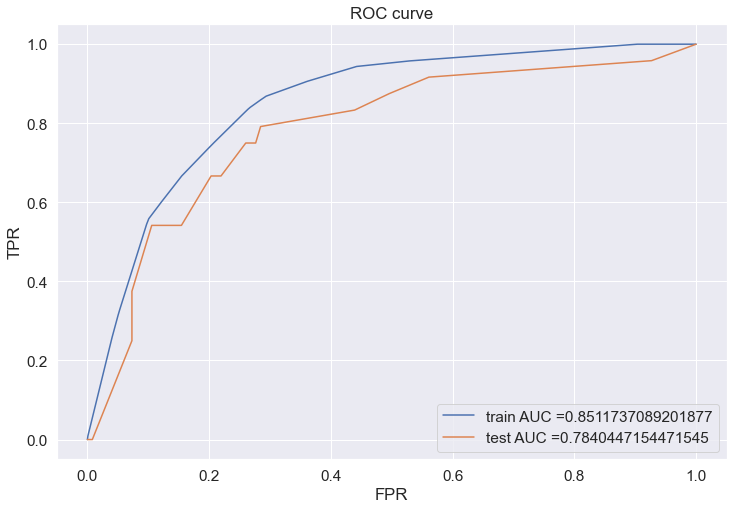

Confusion matrix


Text(0.5, 1.0, 'Confusion Matrix')

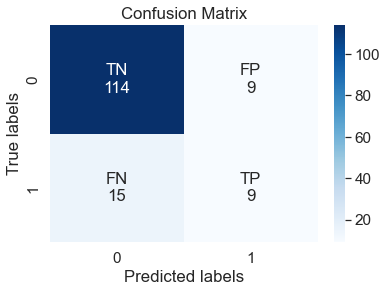

<Figure size 216x216 with 0 Axes>

In [64]:
decision_tree= DecisionTreeClassifier(max_depth=10,min_samples_split=100)
decision_tree.fit(X_train_prep,y_train)

y_train_pred= decision_tree.predict_proba(X_train_prep)[:,1]
y_test_pred= decision_tree.predict_proba(X_test_prep)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (12,8))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
y_pred= [1 if i>0.5 else 0 for i in y_test_pred]
from sklearn.metrics import confusion_matrix         
ax=plt.subplot()
plt.figure(figsize = (3,3))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
sns.set(font_scale=1.4)
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip (group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

ax.set_title('Confusion Matrix')

# Model Training- SVC

## Hyperparameter Tuninig

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

parameters={'kernel':['linear', 'rbf', 'poly'], "C":[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

svc = SVC()
clf3 = GridSearchCV(svc, parameters, cv=3, scoring='f1_micro',return_train_score=True)
clf3.fit(X_train_prep, y_train)
clf3.best_params_

{'C': 50, 'kernel': 'linear'}

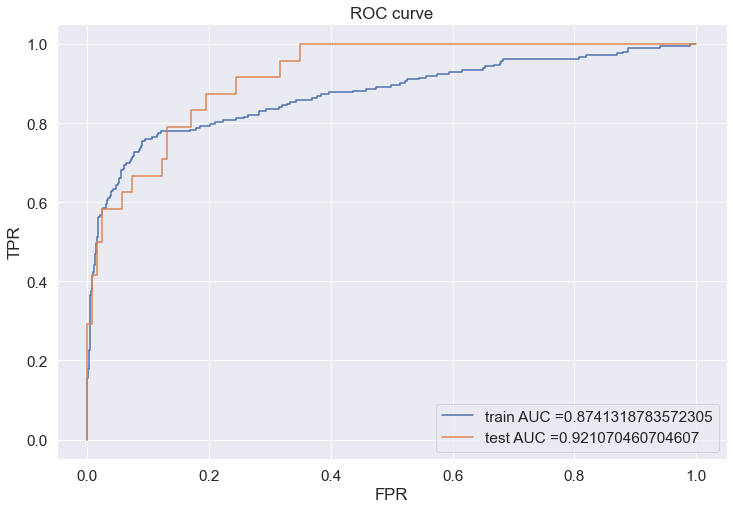

Confusion matrix


Text(0.5, 1.0, 'Confusion Matrix')

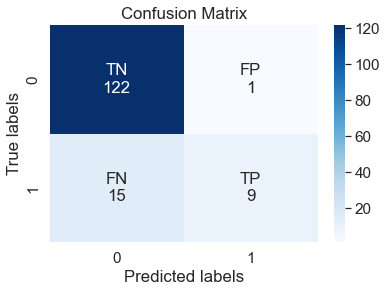

<Figure size 216x216 with 0 Axes>

In [66]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV

svc_classifier = SVC(kernel='linear', C=1, probability=True)
svc_classifier.fit(X_train_prep,y_train)
sig_clf = CalibratedClassifierCV(svc_classifier, method="sigmoid")
sig_clf.fit(X_train_prep,y_train)

y_train_pred = sig_clf.predict_proba(X_train_prep)[:,1]
y_test_pred = sig_clf.predict_proba(X_test_prep)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (12,8))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
y_pred= [1 if i>0.5 else 0 for i in y_test_pred]
from sklearn.metrics import confusion_matrix         
ax=plt.subplot()
plt.figure(figsize = (3,3))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
sns.set(font_scale=1.4)
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip (group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

ax.set_title('Confusion Matrix')



# Model Training- XGBoost

## Hyperparameter Tuninig

In [67]:

from xgboost import XGBClassifier

parameters ={'max_depth': [2,3,5,7],'n_estimators': [50,75,100,150]}

classifier1= XGBClassifier(verbosity = 0)  #referecnce:https://stackoverflow.com/questions/58318685/how-to-hide-warnings-from-xgboost-library-in-jupyter

clf1 = GridSearchCV(classifier1, parameters, cv=3, scoring='roc_auc',return_train_score=True)
clf1.fit(X_train_prep, y_train)

clf1.best_params_

{'max_depth': 2, 'n_estimators': 75}

## Training on best parameters

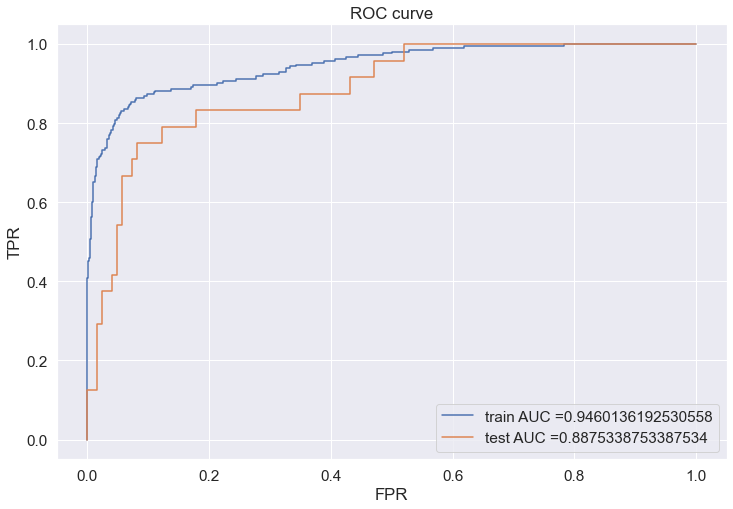

Confusion matrix


Text(0.5, 1.0, 'Confusion Matrix')

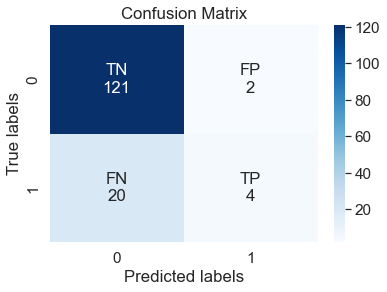

<Figure size 216x216 with 0 Axes>

In [68]:
xgb= XGBClassifier(max_depth=2,n_estimators= 50,verbosity = 0)
xgb.fit(X_train_prep,y_train)

y_train_pred= xgb.predict_proba(X_train_prep)[:,1]
y_test_pred= xgb.predict_proba(X_test_prep)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.figure(figsize = (12,8))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
y_pred= [1 if i>0.5 else 0 for i in y_test_pred]
from sklearn.metrics import confusion_matrix         
ax=plt.subplot()
plt.figure(figsize = (3,3))

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix")
sns.set(font_scale=1.4)
#https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip (group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

ax.set_title('Confusion Matrix')

In [1]:
#Reference: https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/

from prettytable import PrettyTable
t = PrettyTable(['Featurization','Model','Threshold','Train_AUC','Test_AUC','Precision','Recall'])
t.add_row(['Normalization + Label_Encoding', 'LogRegression',0.5,0.79,0.76,'0.5','0.125'])
t.add_row(['Normalization + Label_Encoding', 'Decision_Tree',0.5,0.80,0.76,'0','0'])
t.add_row(['Normalization + Label_Encoding', 'SVC',0.5,0.85,0.80,'0.375','0.125'])
t.add_row(['Normalization + Label_Encoding', 'XGBoost',0.5,0.99,0.81,'0.5','0.125'])
print(t)

from prettytable import PrettyTable
t = PrettyTable(['Featurization','Model','Threshold','Train_AUC','Test_AUC','Precision','Recall'])
t.add_row(['Normalization + One_Hot_Encoding', 'LogRegression',0.5,0.89,0.88,'0.41','0.83'])
t.add_row(['Normalization + One_Hot_Encoding', 'Decision_Tree',0.5,0.85,0.78,'0.5','0.375'])
t.add_row(['Normalization + One_Hot_Encoding', 'SVC',0.5,0.87,0.92,'0.9','0.375'])
t.add_row(['Normalization + One_Hot_Encoding', 'XGBoost',0.5,0.94,0.88,'0.66','0.166'])
print(t)

+--------------------------------+---------------+-----------+-----------+----------+-----------+--------+
|         Featurization          |     Model     | Threshold | Train_AUC | Test_AUC | Precision | Recall |
+--------------------------------+---------------+-----------+-----------+----------+-----------+--------+
| Normalization + Label_Encoding | LogRegression |    0.5    |    0.79   |   0.76   |    0.5    | 0.125  |
| Normalization + Label_Encoding | Decision_Tree |    0.5    |    0.8    |   0.76   |     0     |   0    |
| Normalization + Label_Encoding |      SVC      |    0.5    |    0.85   |   0.8    |   0.375   | 0.125  |
| Normalization + Label_Encoding |    XGBoost    |    0.5    |    0.99   |   0.81   |    0.5    | 0.125  |
+--------------------------------+---------------+-----------+-----------+----------+-----------+--------+
+----------------------------------+---------------+-----------+-----------+----------+-----------+--------+
|          Featurization           

# Conclusion:

1. Here if we see we care more about people who are highly probable to leave the company. And it is okay if we predict some of the Attrition= No as Attrition= Yes,but we cannot afford that if model predicts Attrition=yes as Attrition=No as we may lose those people.

2. So looking at the Confusion matrix we always need False Negative value to be zero ideally and large False Positive value is acceptable. 

3. Looking at the confusion matrix values for all models, we know only Logistic Regression has the least False Negative value. So Logistic Regression will fulfill the purpose in detecting Attrition probable employees.
